# Problem Statement

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [776]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [777]:
netflix_df = pd.read_csv('netflix_data.csv')
print(netflix_df.shape)
netflix_df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [778]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [779]:
netflix_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# Challenges/Cost

1. Unnest director, cast, country and listed_in features
2. Handle null/missing values for director, cast, country, date added, rating and duration
3. Convert categorical features to continuous features like duration
4. Extract year, month and day_name from date_added

### Remove not useful columns for this analysis - show_id and description 

In [780]:
netflix_df = netflix_df.drop(['show_id', 'description'], axis=1)
netflix_df = netflix_df.reset_index(drop=True)
print(netflix_df.shape)
netflix_df.head()

(8807, 10)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Challenge:  Get Year-month name-day name from date_added

In [781]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year-added'] = netflix_df['date_added'].apply(lambda x : str(x.year))
netflix_df['month-added'] = netflix_df['date_added'].dt.month_name()
netflix_df['day-added'] = netflix_df['date_added'].dt.day_name()
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday


# Univariate Analysis

### Type analysis

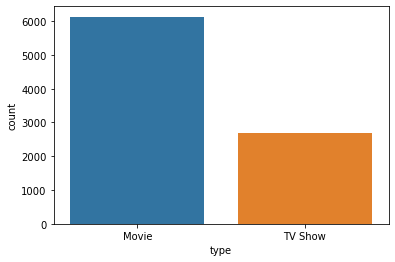

In [782]:
#Movie vs TV show counts
sns.countplot(data=netflix_df, x='type')
plt.show()

## Insights: Listed movies are more compare to TV show
## Recommendations: Netflix should increase TV show

### Rating Analysis

Unique ratings: 17


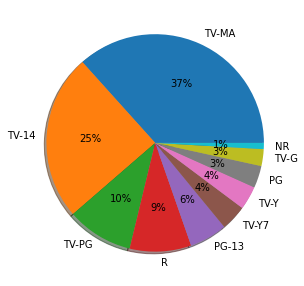

In [783]:
#rating counts
print('Unique ratings:',netflix_df.rating.nunique())
plt.figure(figsize=(9,5))
rating_counts = netflix_df.rating.value_counts()[:10]
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.0f%%', shadow=True)
plt.show()

## Insights: Out of 17 ratings type major categories of rating are TV-MA and TV-14 
## Recommendations: Add more content from TV-MA and TV-14 ratings

### Country Analysis
#### Challenge: Fill NA values with No country and unnest country

In [784]:
netflix_country = netflix_df.copy()
netflix_country['country'] = netflix_country['country'].fillna('No Country')
netflix_country['country'] = netflix_country['country'].str.split(', ')

In [785]:
netflix_country = netflix_country.explode('country')
netflix_country.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday


In [786]:
print('Unique Countries: ', netflix_country.country.nunique())

Unique Countries:  128


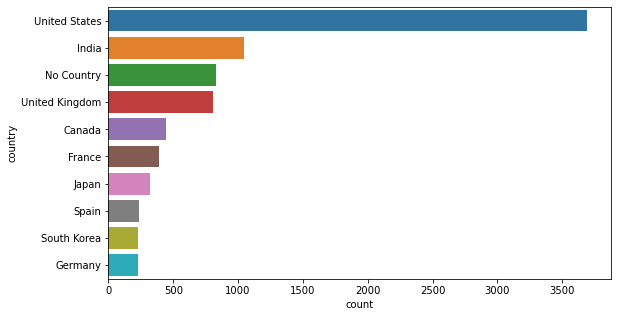

In [787]:
plt.figure(figsize=(9,5))
sns.countplot(data=netflix_country, y = 'country', order=netflix_country['country'].value_counts().index[:10])
plt.show()

## Insights: There are 128 countries who produced content for netflix but most of the content produced by USA.

## Recommendations: Netflix should add more content from India, UK and Canada as an experiment

### Country Analysis with Type

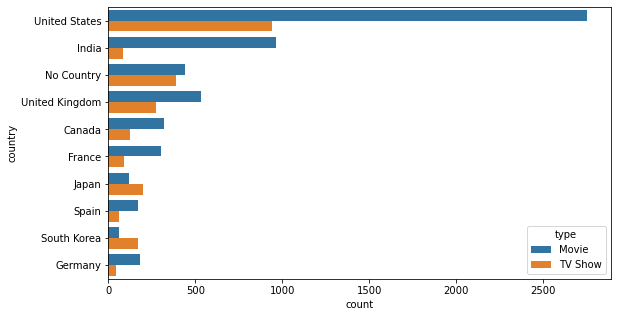

In [788]:
plt.figure(figsize=(9,5))
sns.countplot(data=netflix_country, y = 'country', order=netflix_country['country'].value_counts().index[:10], hue='type')
plt.show()


## Insights: Movies weightage is very high compare to TV show for top countries: USA, India, UK, Canada

## Recommendations: Listed TV shows are very less compare to movies so Netflix should add more USA and India produced TV shows

### Divide data into two parts on type: Movie and TV show for further analysis

In [789]:
#divide df into two parts with type
netflix_df_gp = netflix_df.groupby('type')
netflix_df_mv = netflix_df_gp.get_group('Movie')
netflix_df_tv = netflix_df_gp.get_group('TV Show')

netflix_df_tv.shape, netflix_df_mv.shape

((2676, 13), (6131, 13))

### Duration Analysis

#### Challenge: 
1. Convert duration to continuous variable
2. Fill NA values with mean of movie  and TV show duration 

In [790]:
import math
import warnings
warnings.filterwarnings('ignore')

def get_avg(df, unit):
    df = df.dropna(subset='duration')
    df['duration'] = df['duration'].apply(lambda x : int(x.split()[0].strip()))
    avg = df.duration.mean()
    return str(math.ceil(avg)) + unit

In [791]:
movie_avg_time = get_avg(netflix_df_mv, ' min')
tv_avg_time = get_avg(netflix_df_tv, ' Seasons')

## Insights: Avg Movie time: 100 min , Avg TV Show Time: 2 seasons

In [792]:
netflix_df_mv['duration'] = netflix_df_mv['duration'].fillna(movie_avg_time)
netflix_df_mv['duration'] = netflix_df_mv['duration'].apply(lambda x : int(x.split()[0].strip()))
netflix_df_mv.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,2021,September,Saturday
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91,Children & Family Movies,2021,September,Friday


In [793]:
netflix_df_tv['duration'] = netflix_df_tv['duration'].fillna(tv_avg_time)
netflix_df_tv['duration'] = netflix_df_tv['duration'].apply(lambda x : int(x.split()[0].strip()))
netflix_df_tv.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday


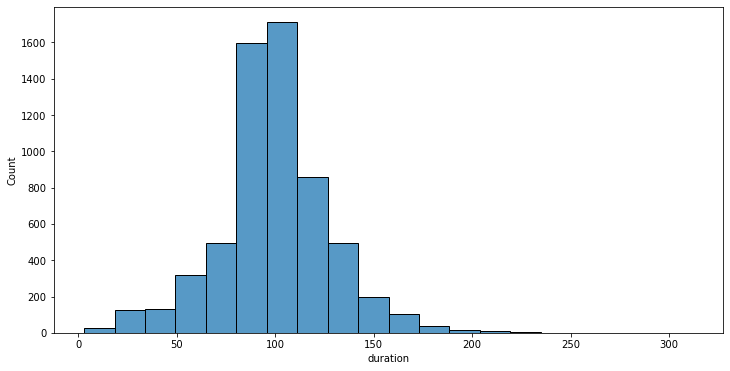

In [794]:
#movie duration
plt.figure(figsize=(12,6))
sns.histplot(data = netflix_df_mv, x='duration', bins=20)
plt.show()

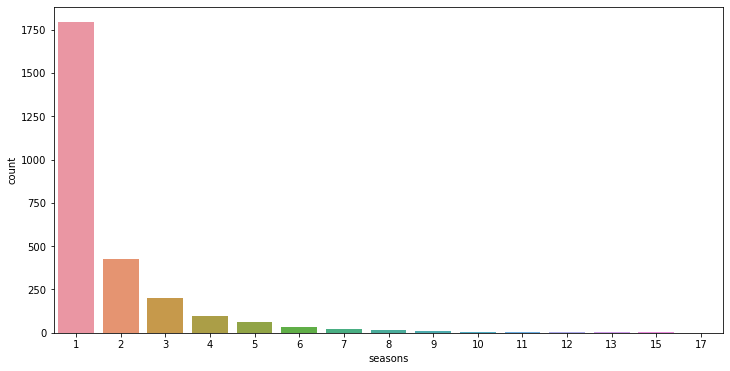

In [795]:
#tv show  seasons 
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df_tv, x='duration')
plt.xlabel('seasons')
plt.show()

## Insights: Mostly movies duration in between 90-110 mins,  Mostly TV show has 1 season only
## Recommendations: Netflix should add 90-110 mins movies more and add second season for TV show as experient

### Movie-TV show rating analysis

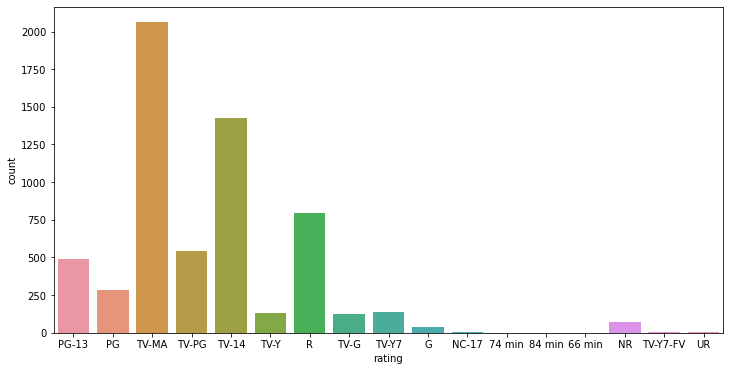

In [796]:
#movies rating
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df_mv, x='rating')
plt.show()

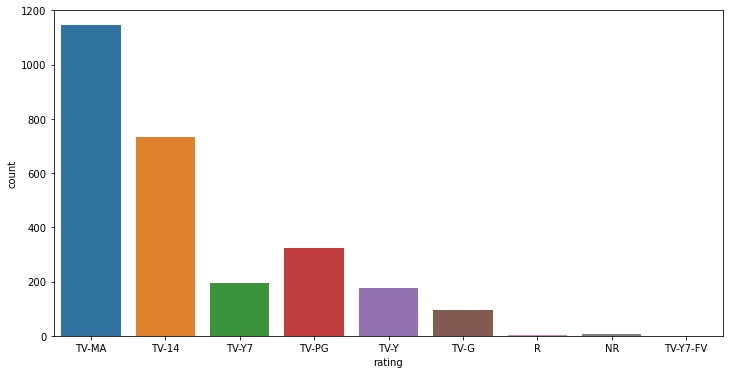

In [797]:
#tv show rating
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df_tv, x='rating')
plt.show()

## Insights: TV-MA and TV-14 are major categories for both movies and tv shows

#### Movies-TV show releasing pattern over last 20 years

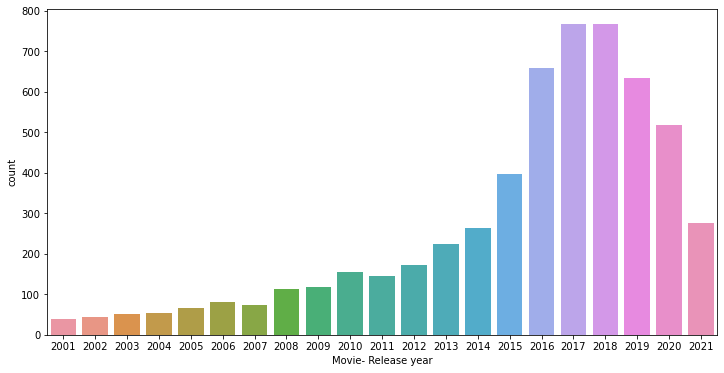

In [798]:
#movies relesed from 2000
plt.figure(figsize=(12,6))
year_sort = netflix_df_mv[netflix_df_mv['release_year']>2000]['release_year']
order_sort = year_sort.value_counts().sort_index().index
sns.countplot(data = netflix_df_mv, x='release_year', order=order_sort)
plt.xlabel('Movie- Release year')
plt.show()

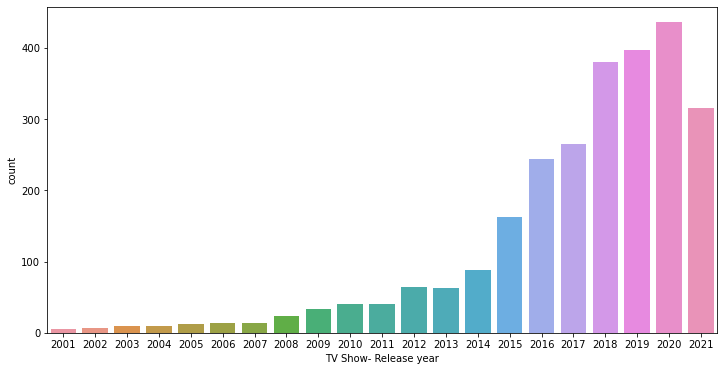

In [799]:
#tv show relesed from 2000
plt.figure(figsize=(12,6))
year_sort = netflix_df_tv[netflix_df_tv['release_year']>2000]['release_year']
order_sort = year_sort.value_counts().sort_index().index
sns.countplot(data = netflix_df_tv, x='release_year', order=order_sort)
plt.xlabel('TV Show- Release year')
plt.show()

## Insights: Most of the listed movies releaed in between 2016-2020,  Most of the listed tv show releaed after 2018
## Recommendations: Netflix should add more movies from release year 2021 

#### Let's see in which month more movies/tv show added to netflix

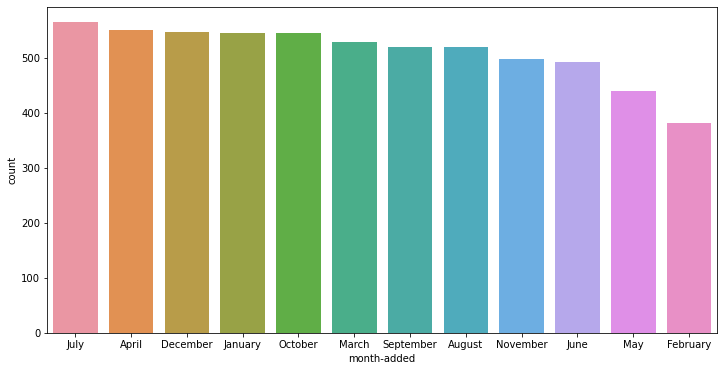

In [800]:
#month frq of movie
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df_mv, x='month-added', order=netflix_df_mv['month-added'].value_counts().index)
plt.show()

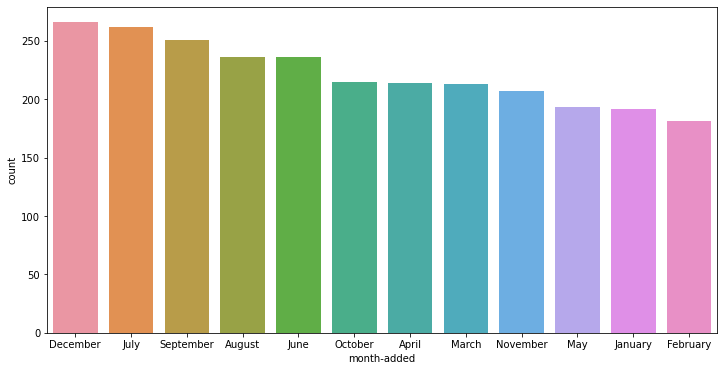

In [801]:
#month frq of tv show
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df_tv, x='month-added', order=netflix_df_tv['month-added'].value_counts().index)
plt.show()

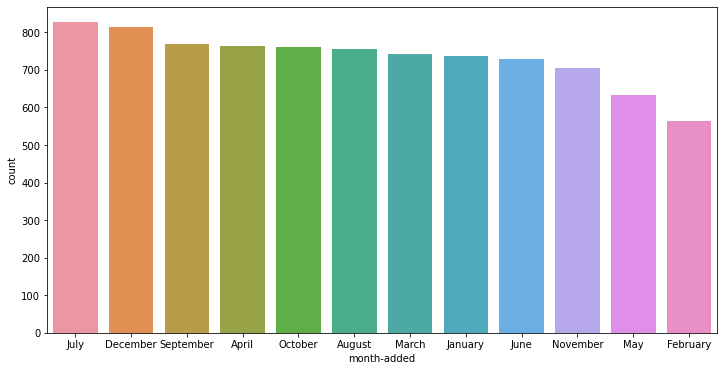

In [802]:
#month frq of all
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df, x='month-added', order=netflix_df['month-added'].value_counts().index)
plt.show()

##### Insights: Not clear patten of added-month but less content added in May and Feb compare to other months

### Day-name analysis

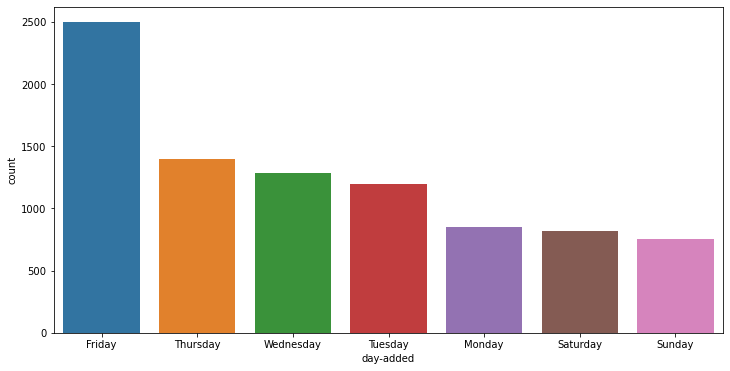

In [803]:
#day frq of all
plt.figure(figsize=(12,6))
sns.countplot(data = netflix_df, x='day-added', order=netflix_df['day-added'].value_counts().index)
plt.show()

## Insights: Most of the content added on Friday only
## Recommendations: Netflix should add content on Friday

### Director Analysis
#### Challenge: Fill NA values with No director and unnest it

In [804]:
netflix_dir = netflix_df.copy()
netflix_dir['director'] = netflix_dir['director'].fillna('No Director')
netflix_dir['director'] = netflix_dir['director'].str.split(', ')
netflix_dir = netflix_dir.explode('director')
netflix_dir.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday
3,TV Show,Jailbirds New Orleans,No Director,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,Friday
4,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September,Friday


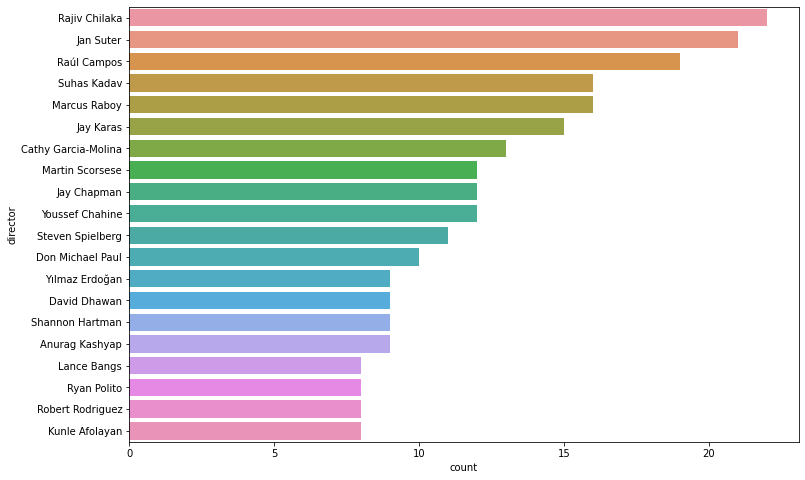

In [805]:
#top 20 director
plt.figure(figsize=(12,8))
sns.countplot(data=netflix_dir, y='director', order=netflix_dir.director.value_counts().index[1:21])
plt.show()

## Insights: Plotted top 20 directors. Rajiv Chilaka, Jan Suter and Raul Campos are top three director on listed content
## Recommendations: Rajiv Chilaka, Jan Suter and Raul Campos directed movies should add more on platform

### Cast Analysis
#### Challenge: Fill NA values with No Cast and unnest it

In [806]:
netflix_cast = netflix_df.copy()
netflix_cast['cast'] = netflix_cast['cast'].fillna('No Cast')
netflix_cast['cast'] = netflix_cast['cast'].str.split(', ')
netflix_cast = netflix_cast.explode('cast')
netflix_cast.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday


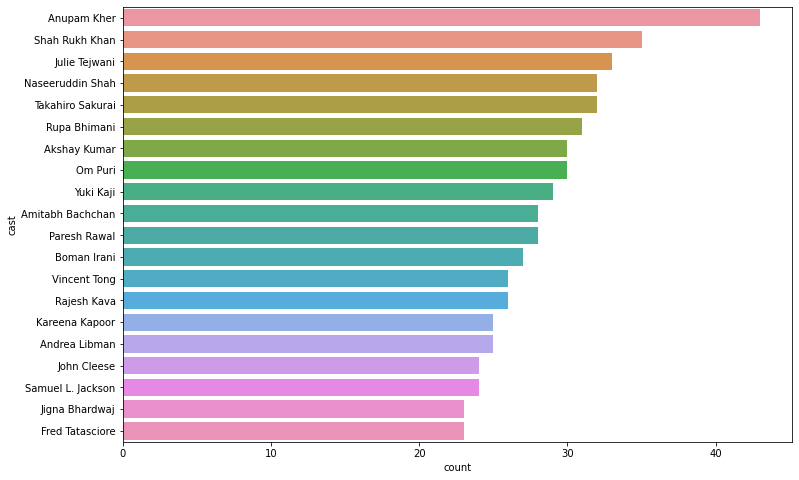

In [807]:
#top 20 cast
plt.figure(figsize=(12,8))
sns.countplot(data=netflix_cast, y='cast', order=netflix_cast.cast.value_counts().index[1:21])
plt.show()

## Insights: Plotted top 20 casts. Anupam Kher, Shah rukh khan and Julie Tejwani are top three casts on listed content
## Recommendations: Content casted with Anupam Kher, Shah rukh khan and Julie Tejwani should add more on platform.

### Genre Analysis
#### Challenge: Fill NA values with No Genre and unnest it

In [808]:
netflix_genre = netflix_df.copy()
netflix_genre['listed_in'] = netflix_genre['listed_in'].fillna('No Genre')
netflix_genre['listed_in'] = netflix_genre['listed_in'].str.split(', ')
netflix_genre = netflix_genre.explode('listed_in')
netflix_genre.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,September,Friday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2021,September,Friday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021,September,Friday


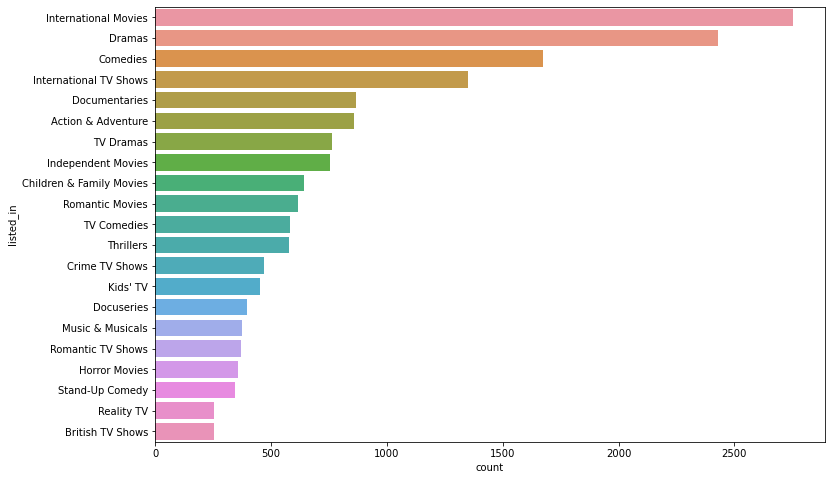

In [809]:
#top 20 genre
plt.figure(figsize=(12,8))
sns.countplot(data=netflix_genre, y='listed_in', order=netflix_genre.listed_in.value_counts().index[:21])
plt.show()

## Insights: Plotted top 20 Genre. International Movies, Dramas, Comedies are top three genre on listed content
## Recommendations: Overall Netflix should add more Comedies and International TV shows as an experiment.

# Bivariate analysis

### Country vs Genre
#### Challenge: Unnest country and genre coumns and merge them

In [810]:
netflix_coun_genre = netflix_country.copy()
netflix_coun_genre['listed_in'] = netflix_coun_genre['listed_in'].fillna('No Genre')
netflix_coun_genre['listed_in'] = netflix_coun_genre['listed_in'].str.split(', ')
netflix_coun_genre = netflix_coun_genre.explode('listed_in')
netflix_coun_genre_gp = netflix_coun_genre.groupby('country')
netflix_coun_genre.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,2021,September,Friday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,2021,September,Friday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021,September,Friday


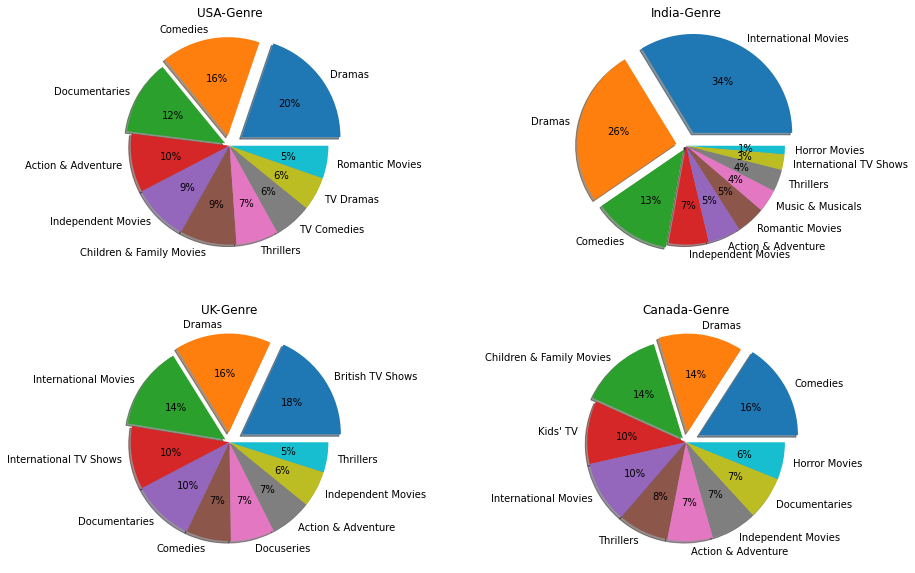

In [811]:
#genre vs country
ind_count_us = netflix_coun_genre_gp.get_group('United States')['listed_in'].value_counts()[:10]
ind_count_in = netflix_coun_genre_gp.get_group('India')['listed_in'].value_counts()[:10]
ind_count_uk = netflix_coun_genre_gp.get_group('United Kingdom')['listed_in'].value_counts()[:10]
ind_count_ca = netflix_coun_genre_gp.get_group('Canada')['listed_in'].value_counts()[:10]

exp_us = [0.15,0.1,0.05, 0,0,0,0,0,0,0]

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)

plt.pie(ind_count_us, labels=ind_count_us.index, autopct='%1.0f%%', shadow=True, explode=exp_us)
plt.title('USA-Genre')

plt.subplot(2,2,2)
plt.pie(ind_count_in, labels=ind_count_in.index, autopct='%1.0f%%', shadow=True,  explode=exp_us)
plt.title('India-Genre')

plt.subplot(2,2,3)
plt.pie(ind_count_uk, labels=ind_count_uk.index, autopct='%1.0f%%', shadow=True,  explode=exp_us)
plt.title('UK-Genre')

plt.subplot(2,2,4)
plt.pie(ind_count_ca, labels=ind_count_ca.index, autopct='%1.0f%%', shadow=True,  explode=exp_us)
plt.title('Canada-Genre')
plt.show()

##### Plotted top 10 genre for top 4 countries
## Insights: 
1. USA has Dramas, Comedies and Documentaries as top 3 genres
2. India has Internation Movies, Dramas and Comedies as top 3 genres
3. UK has British TV Shows, Dramas and Internation Movie as top 3 genres
4. Canada has Comedies, Dramas and Children & Family Movies as top 3 genres

## Recommendations:
Netflix should add more content of - 
1. Overall Dramas and Comedies genres content
2. USA and UK produced Intenational Movies genres content

### Country vs Year-added Analysis

In [812]:
netflix_country2 = netflix_country.dropna(subset='date_added')
netflix_country2['date_added'] = pd.to_datetime(netflix_country2['date_added'])
netflix_country2['year-added'] = netflix_country2['date_added'].apply(lambda x : str(x.year))

netflix_country_gp = netflix_country2.groupby('country')

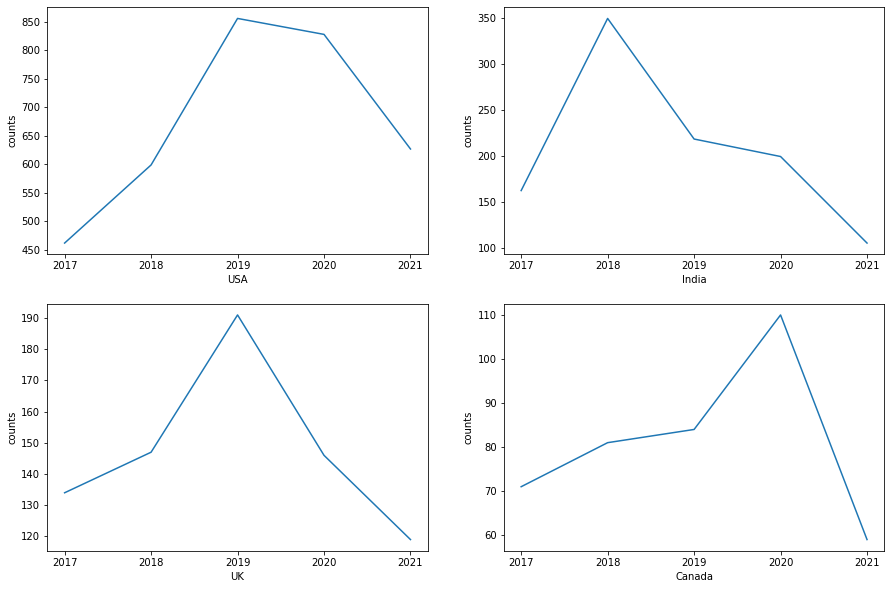

In [813]:
#year added vs country

ind_count_us = netflix_country_gp.get_group('United States')['year-added'].value_counts().sort_index().reset_index(name='counts')[-5:]
ind_count_in = netflix_country_gp.get_group('India')['year-added'].value_counts().sort_index().reset_index(name='counts')[-5:]
ind_count_uk = netflix_country_gp.get_group('United Kingdom')['year-added'].value_counts().sort_index().reset_index(name='counts')[-5:]
ind_count_ca = netflix_country_gp.get_group('Canada')['year-added'].value_counts().sort_index().reset_index(name='counts')[-5:]

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(data = ind_count_us, x='index', y='counts')
plt.xlabel('USA')

plt.subplot(2,2,2)
sns.lineplot(data = ind_count_in, x='index', y='counts')
plt.xlabel('India')

plt.subplot(2,2,3)
sns.lineplot(data = ind_count_uk, x='index', y='counts')
plt.xlabel('UK')

plt.subplot(2,2,4)
sns.lineplot(data = ind_count_ca, x='index', y='counts')
plt.xlabel('Canada')

plt.show()


##### Plotted past 5 years added content for top 4 countries
## Insights: 
1. USA produced content added in 2019 most
2. India produced content added in 2018 most
3. UK produced content added in 2019 most
4. Canada produced content added in 2020 most

All four countries produced content decreasing sharply in current years

## Recommendations:
1. Netflix should add more all four countries produced content.

### Year-added vs Rating analysis

In [814]:
netflix_rating = netflix_df.loc[netflix_df['year-added']!='nan']
netflix_rating_gp = netflix_rating.groupby('rating')

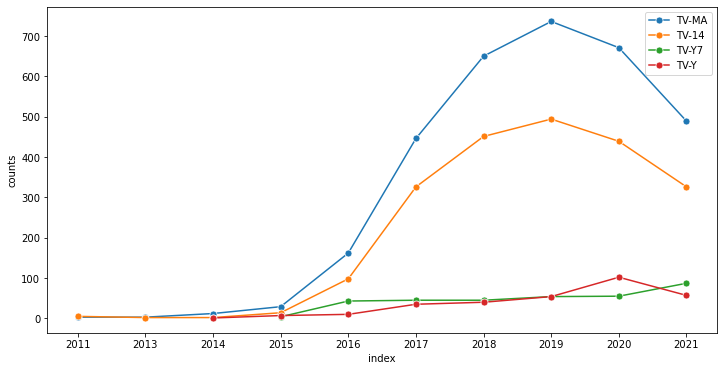

In [815]:
#year added vs genre

ind_count_us = netflix_rating_gp.get_group('TV-MA')['year-added'].value_counts().sort_index().reset_index(name='counts')[-10:]
ind_count_in = netflix_rating_gp.get_group('TV-14')['year-added'].value_counts().sort_index().reset_index(name='counts')[-10:]
ind_count_uk = netflix_rating_gp.get_group('TV-Y7')['year-added'].value_counts().sort_index().reset_index(name='counts')[-10:]
ind_count_ca = netflix_rating_gp.get_group('TV-Y')['year-added'].value_counts().sort_index().reset_index(name='counts')[-10:]

fig = plt.figure(figsize=(12,6))

sns.lineplot(data = ind_count_us, x='index', y='counts', label='TV-MA', marker='o', markersize=7)
sns.lineplot(data = ind_count_in, x='index', y='counts', label='TV-14', marker='o', markersize=7)
sns.lineplot(data = ind_count_uk, x='index', y='counts', label='TV-Y7', marker='o', markersize=7)
sns.lineplot(data = ind_count_ca, x='index', y='counts', label='TV-Y', marker='o', markersize=7)


plt.show()


##### Plotted past 10 years added content for TV-MA, TV-14, TV-Y7 and TV-Y genres
## Insights: 
1. TV-MA and TV-14 genres content decreasing from last two years
2. TV-Y7 and TV-Y genres content is almost going with same pace

## Recommendations:
1. TV-MA and TV-14 content should add more as its decreasing from past 2 years

### Cast vs Country Analysis

In [816]:
netflix_cast_con = netflix_cast.dropna(subset='country')
netflix_cast_con = netflix_cast_con.loc[netflix_cast_con.cast!='No Cast']
netflix_cast_con['country'] = netflix_cast_con['country'].str.split(", ")
netflix_cast_con = netflix_cast_con.explode('country')
netflix_cast_con_gp = netflix_cast_con.groupby('country')
netflix_cast_con.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
1,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday
1,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September,Friday


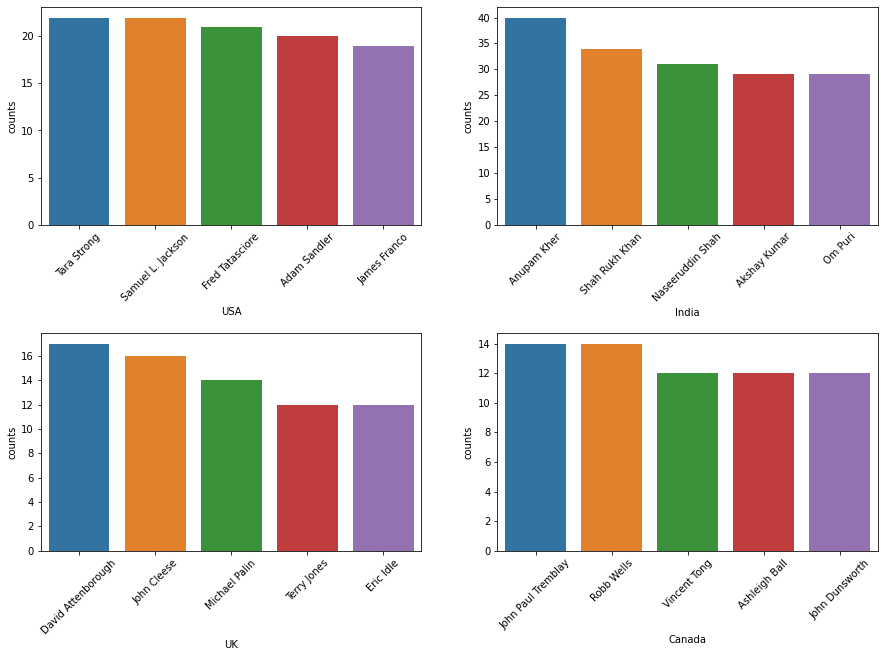

In [817]:
#cast vs country

ind_count_us = netflix_cast_con_gp.get_group('United States')['cast'].value_counts().reset_index(name='counts')[:5]
ind_count_in = netflix_cast_con_gp.get_group('India')['cast'].value_counts().reset_index(name='counts')[:5]
ind_count_uk = netflix_cast_con_gp.get_group('United Kingdom')['cast'].value_counts().reset_index(name='counts')[:5]
ind_count_ca = netflix_cast_con_gp.get_group('Canada')['cast'].value_counts().reset_index(name='counts')[:5]

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data = ind_count_us, x='index', y='counts')
plt.xlabel('USA')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(data = ind_count_in, x='index', y='counts')
plt.xlabel('India')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(data = ind_count_uk, x='index', y='counts')
plt.xlabel('UK')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(data = ind_count_ca, x='index', y='counts')
plt.xlabel('Canada')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()


##### Plotted top cast for top 4 countries
## Insights: 
1. USA produced content has Tara, Samuel, Fred, Adam and James as top 5 casts
2. India produced content has Anupam, Shahrukh, Naseeruddin, Akshay and Om as top 5 casts
3. UK produced content has David, John, Michael, Terry and Eric as top 5 casts
4. Canada produced content has John Paul, Robb, Vincent, Ashieigh and John Dunsworth as top 5 casts

## Recommendations
Netflix should add more content from above top 5 casts respective to countries

### Director vs Country Analysis

In [818]:
netflix_dir_con = netflix_dir.dropna(subset='country')
netflix_dir_con = netflix_dir_con.loc[netflix_dir_con.director!='No Director']
netflix_dir_con['country'] = netflix_dir_con['country'].str.split(", ")
netflix_dir_con = netflix_dir_con.explode('country')
netflix_dir_con_gp = netflix_dir_con.groupby('country')
netflix_dir_con.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday


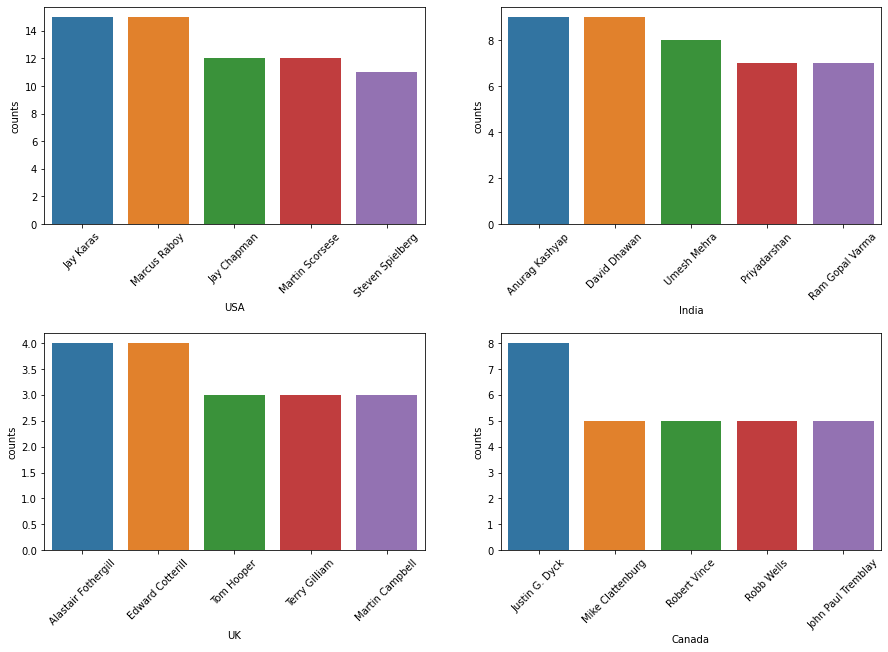

In [819]:
#director vs country

ind_count_us = netflix_dir_con_gp.get_group('United States')['director'].value_counts().reset_index(name='counts')[:5]
ind_count_in = netflix_dir_con_gp.get_group('India')['director'].value_counts().reset_index(name='counts')[:5]
ind_count_uk = netflix_dir_con_gp.get_group('United Kingdom')['director'].value_counts().reset_index(name='counts')[:5]
ind_count_ca = netflix_dir_con_gp.get_group('Canada')['director'].value_counts().reset_index(name='counts')[:5]

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data = ind_count_us, x='index', y='counts')
plt.xlabel('USA')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(data = ind_count_in, x='index', y='counts')
plt.xlabel('India')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(data = ind_count_uk, x='index', y='counts')
plt.xlabel('UK')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(data = ind_count_ca, x='index', y='counts')
plt.xlabel('Canada')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()


##### Plotted top Directors for top 4 countries
## Insights: 
1. Jay and Marcus have directed highest movies for USA
2. Anurag and David have directed highest movies for India
3. Alastair and Edward have directed highest movies for UK
4. Justin has directed highest movies for canada

## Recommendations
Netflix should add more content from above top 5 directors respective to countries

### Director vs Genre Analysis

In [820]:
netflix_dir_gen = netflix_dir.loc[netflix_dir.director!='No Director']
netflix_dir_gen['listed_in'] = netflix_dir_gen['listed_in'].str.split(", ")
netflix_dir_gen['country'] = netflix_dir_gen['country'].str.split(", ")
netflix_dir_gen = netflix_dir_gen.explode('listed_in')
netflix_dir_gen = netflix_dir_gen.explode('country')
netflix_dir_gen_gp = netflix_dir_gen.groupby('listed_in')
netflix_dir_gen.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year-added,month-added,day-added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,International TV Shows,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,TV Action & Adventure,2021,September,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,TV Dramas,2021,September,Friday


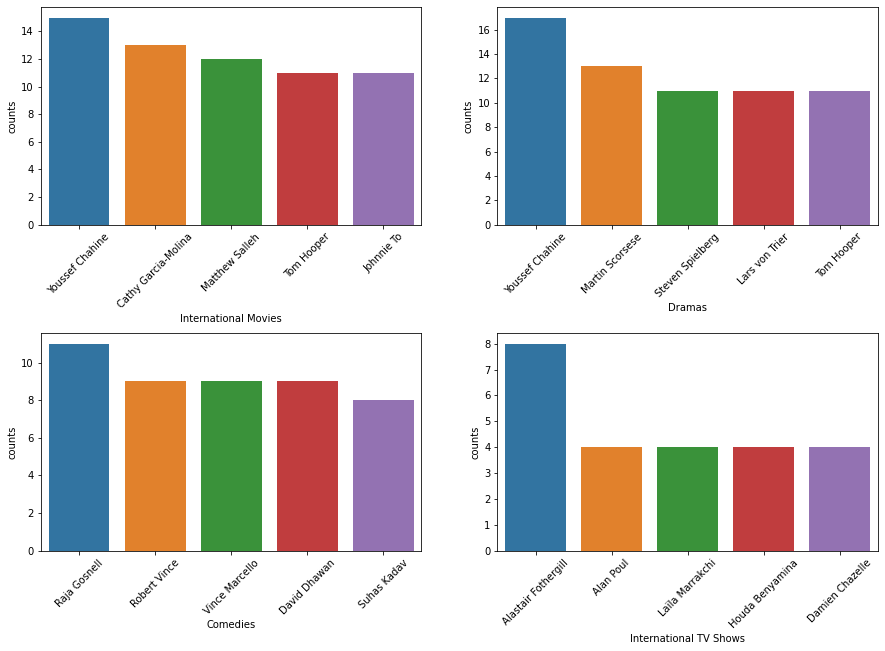

In [821]:
#director vs country

ind_count_us = netflix_dir_gen_gp.get_group('International Movies')['director'].value_counts().reset_index(name='counts')[:5]
ind_count_in = netflix_dir_gen_gp.get_group('Dramas')['director'].value_counts().reset_index(name='counts')[:5]
ind_count_uk = netflix_dir_gen_gp.get_group('Comedies')['director'].value_counts().reset_index(name='counts')[:5]
ind_count_ca = netflix_dir_gen_gp.get_group('International TV Shows')['director'].value_counts().reset_index(name='counts')[:5]

fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data = ind_count_us, x='index', y='counts')
plt.xlabel('International Movies')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(data = ind_count_in, x='index', y='counts')
plt.xlabel('Dramas')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(data = ind_count_uk, x='index', y='counts')
plt.xlabel('Comedies')
plt.xticks(rotation=45)

plt.subplot(2,2,4)
sns.barplot(data = ind_count_ca, x='index', y='counts')
plt.xlabel('International TV Shows')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace = 0.5)

plt.show()


##### Plotted top Directors for top 4 Genres
## Insights: 
1. Youseff Chahine has directed highest movies in Internationl Movies and Dramas Genres.
2. Raja Gosnell has directed highest movies in Comedies genre
3. Alastair Forthergill has directed highest movies in International TV Shows Genre.

## Recommendations
1. Netflix should add more content Youseff Chahine directed movies in International and Dramas genres
2. Raja Gosnell directed comedies movies
3. Alastair directed Internation TV shows